In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing

In [2]:
df=pd.read_csv('train.csv')         #to read the csv file
df.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [3]:
df.shape        #shape of dataset(no of rows,no of columns)

(13994, 30)

We have a dataset with 13994 rows and 30 columns. We have to
predict whether the player is selected or not.


In [4]:
df.info()       #represents the null value count and data type of every column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [5]:
df.drop(['player_id','name'],inplace=True,axis=1)   #since name and playerID doesnot affect the test result, dropping those columns

In [6]:
df.describe()       #shows the descriptive data for numerical columns

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,13994.000000,13994.000000,13994.000000,...,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,21.135844,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,48.108118,52.935973,...,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,16.874551,16.821929,14.201782,...,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,16.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,9.000000,13.000000,...,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,45.000000,...,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,...,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,63.000000,...,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,86.000000,89.000000,...,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


In [7]:
df.selection.value_counts()   #value counts for target variable

1    7802
0    6192
Name: selection, dtype: int64

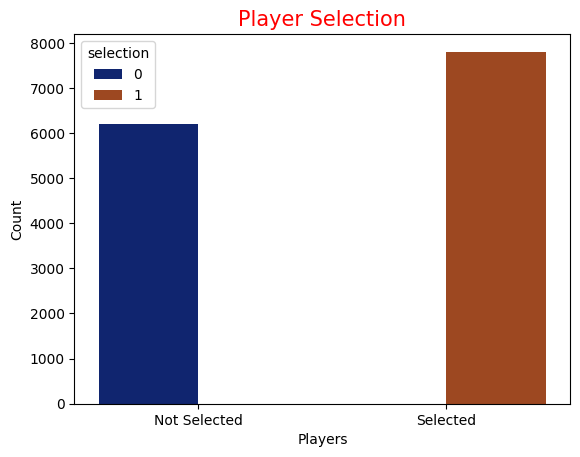

In [8]:
sns.countplot(df, x='selection', palette='dark', hue='selection')     #count plot for target variable
plt.xlabel('Players')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Selected', 'Selected'])
plt.title('Player Selection', color = 'red', fontsize = 15)
plt.show()

From the plot, we can observe the number of players selected.

'Not Selected' (0): The count of players not selected for the game is 6192

'Selected' (1): The count of players selected for the game is 7802

Text(0.5, 1.0, 'Selection based on gender')

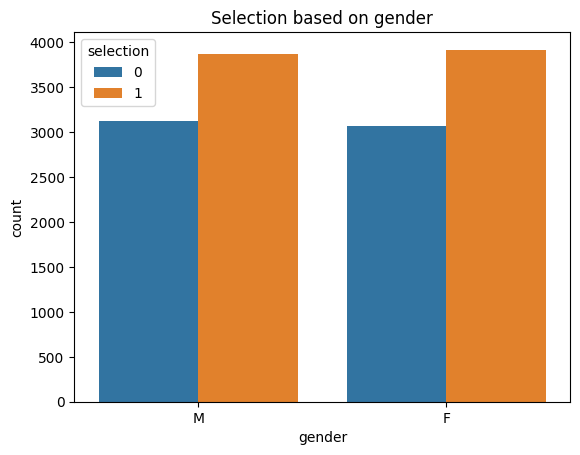

In [9]:
sns.countplot(x=df['gender'],hue=df['selection'])
plt.title('Selection based on gender')

Text(0.5, 1.0, 'Selection based on gender')

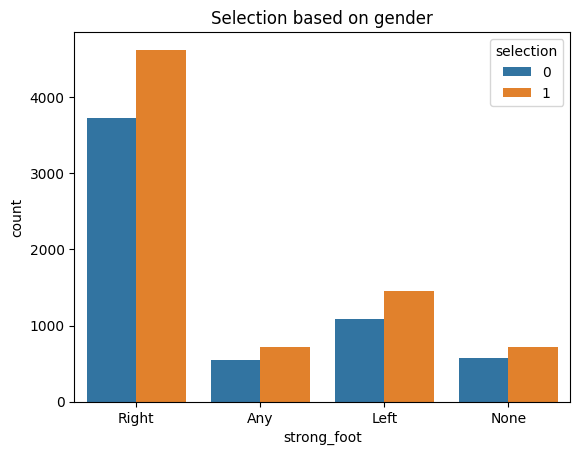

In [10]:
sns.countplot(x=df['strong_foot'],hue=df['selection'])
plt.title('Selection based on gender')

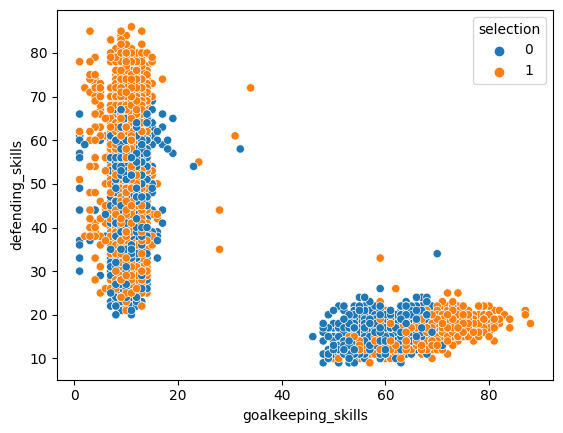

In [11]:
sns.scatterplot(x=df['goalkeeping_skills'],y=df['defending_skills'],hue=df['selection'])
plt.show()

Shows that players with excellent goal keeping skills are best for being goal keepers and not defenders the same way the layers with excellent defending skills are best for being defeners and not goal keepers.

In [12]:
df.isna().sum()

age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int64

In [13]:
#converting height from 5'2 format to inches
df['height'] = df['height'].apply(lambda x: int(x.split("'")[0]) * 12 + int(x.split("'")[1]))
#converting height from 156lbs to 156
df['weight'] = df['weight'].str.replace('lbs', '')
df['weight'] = pd.to_numeric(df['weight'], errors='coerce')

In [14]:
#seperating the numerical columns with null values in the dataset
num = ['weight','ball_controlling_skills','jumping_skills','penalties_conversion_rate','mental_strength',
       'shot_accuracy','behaviour_rating','matches_played','fitness_rating','years_of_experience']

In [15]:
#Creating a new DataFrame for numerical columns
df1 = df[num]

#Importing kNNImputer from sklearn
from sklearn.impute import KNNImputer
knn = KNNImputer()
knn.fit(df1)
X = knn.fit_transform(df1)
df1 = pd.DataFrame(X,columns=num)
for col in num:
  df[col] = df1[col]

In [16]:
#replacing null values with mode for categorical columns
df['coaching'].fillna(df['coaching'].mode()[0], inplace=True)
df['strong_foot'].fillna(df['strong_foot'].mode()[0], inplace=True)
df['gender'].fillna(df['gender'].mode()[0], inplace=True)

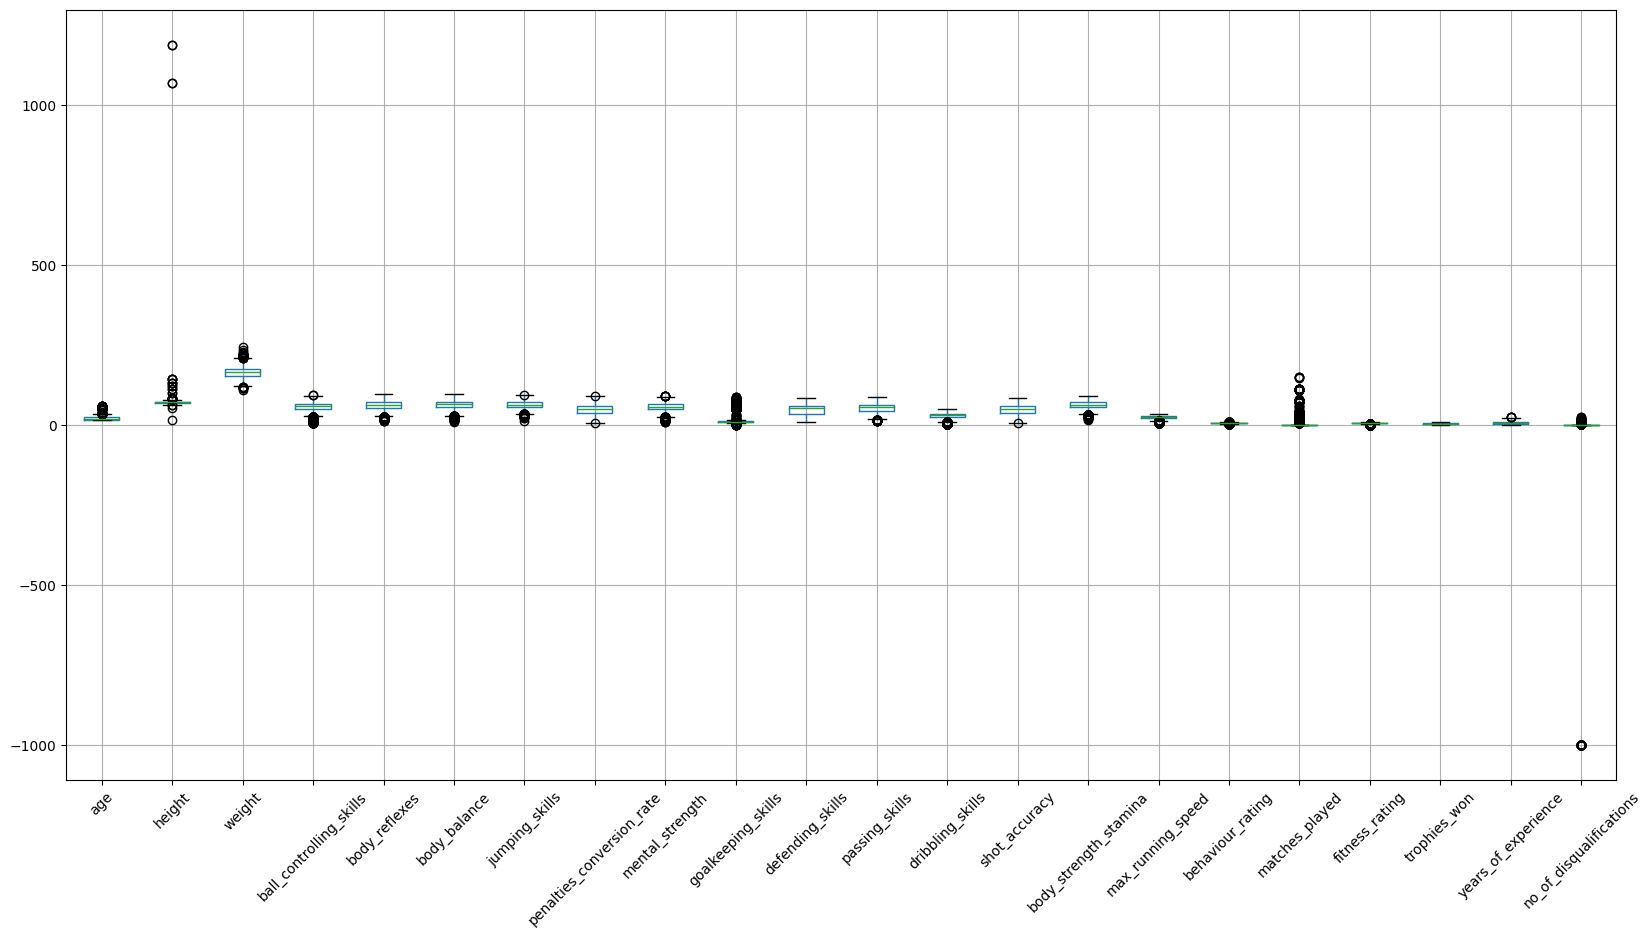

In [17]:
col=['age','height','weight','ball_controlling_skills','body_reflexes','body_balance','jumping_skills','penalties_conversion_rate',
     'mental_strength','goalkeeping_skills','defending_skills','passing_skills','dribbling_skills','shot_accuracy',
     'body_strength_stamina','max_running_speed','behaviour_rating','matches_played','fitness_rating','trophies_won',
     'years_of_experience','no_of_disqualifications']
plt.figure(figsize=(20,10))
df[col].boxplot()
plt.xticks(rotation=45)
plt.show()

In [18]:
out=['age','height','weight','ball_controlling_skills','body_reflexes','body_balance',
     'jumping_skills','mental_strength','goalkeeping_skills','passing_skills','dribbling_skills',
     'body_strength_stamina','max_running_speed','behaviour_rating','matches_played','shot_accuracy',
     'fitness_rating','years_of_experience','no_of_disqualifications','penalties_conversion_rate']

In [19]:
#removing outliers
Q1=df[out].quantile(0.25)
Q2=df[out].quantile(0.50)
Q3=df[out].quantile(0.75)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR
df[out]=np.where(df[out]>upp_lim,upp_lim,np.where(df[out]<low_lim,low_lim,df[out]))

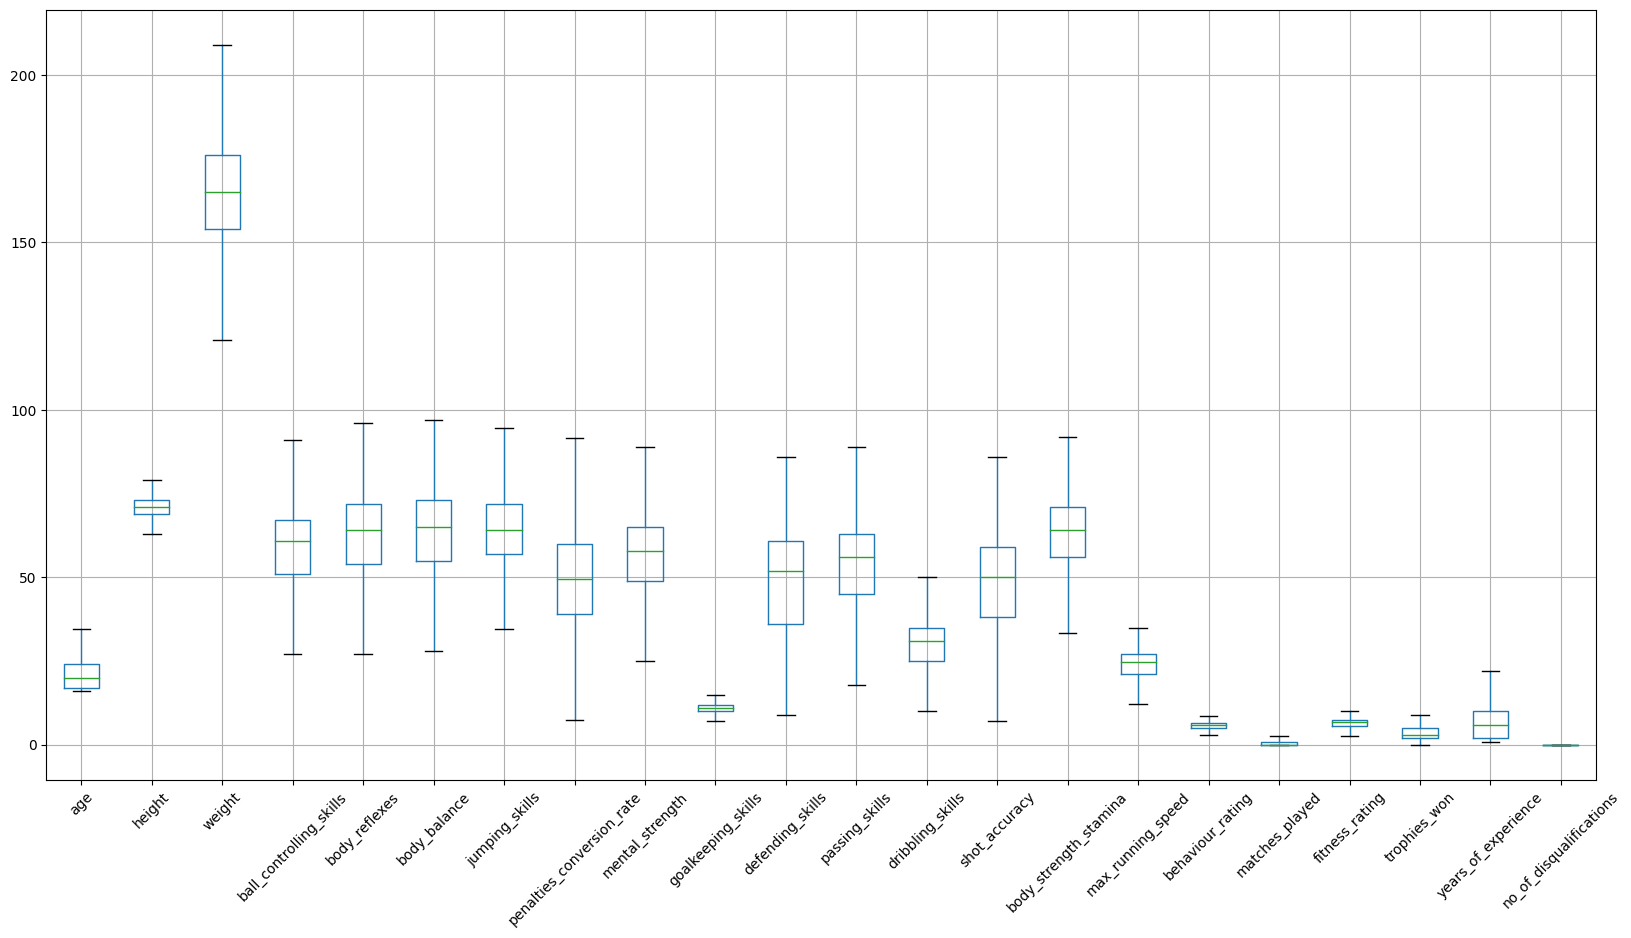

In [20]:
plt.figure(figsize=(20,10))
df[col].boxplot()
plt.xticks(rotation=45)
plt.show()

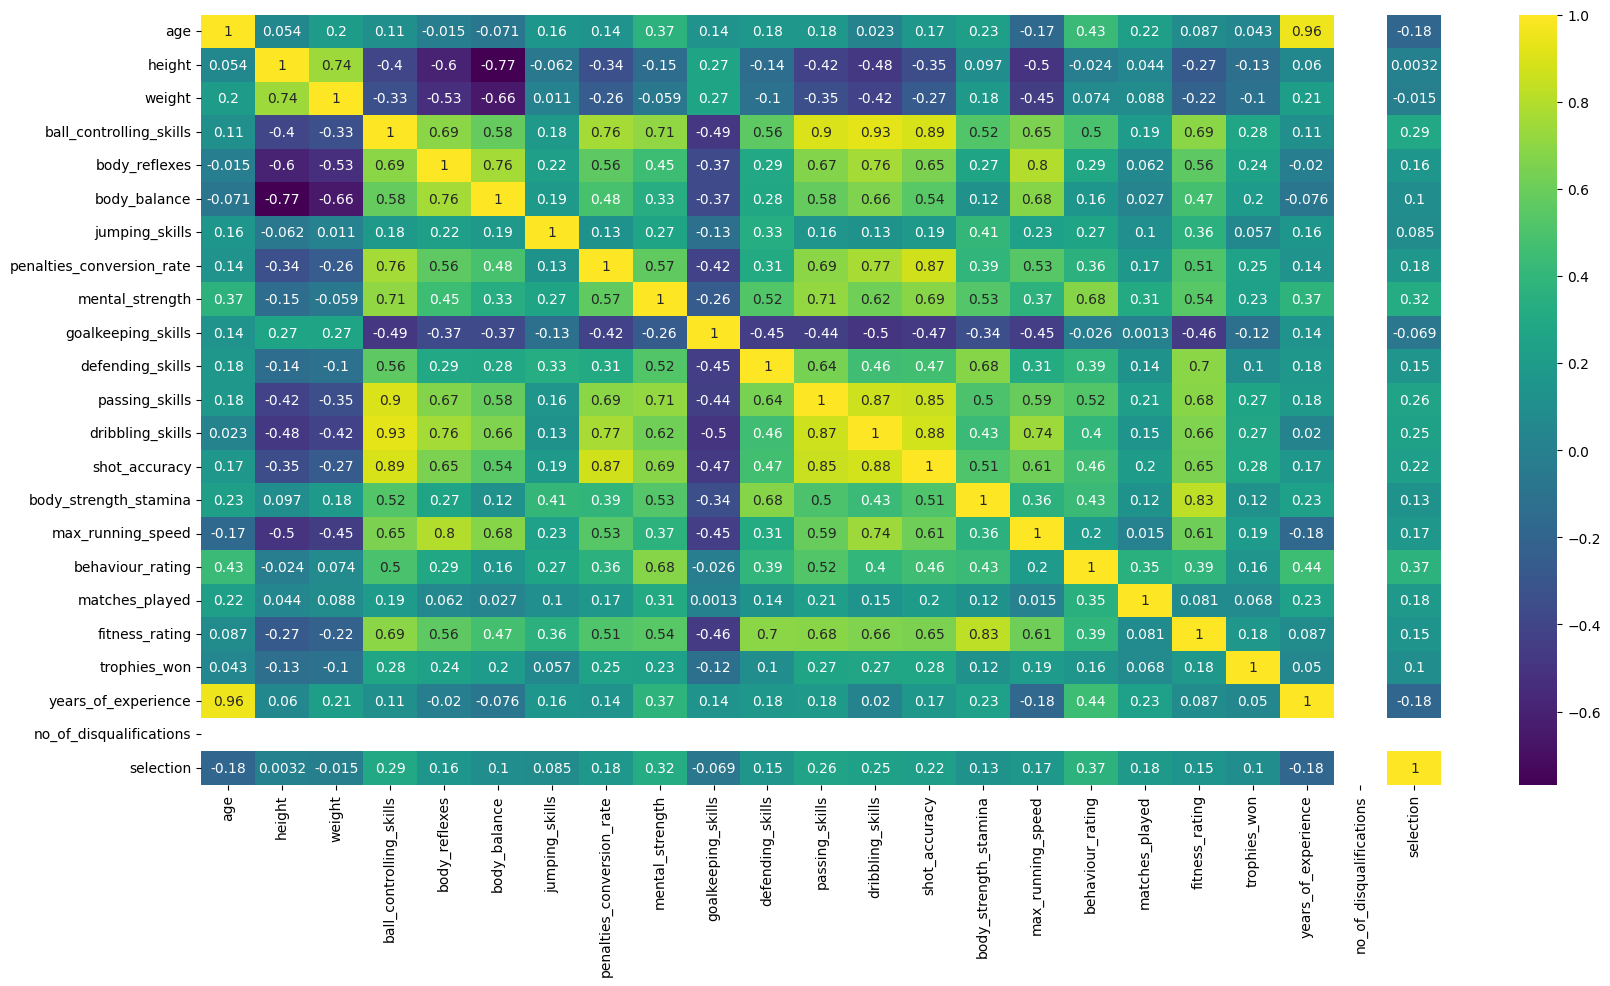

In [21]:
#correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='viridis',annot=True)
plt.show()

In [22]:
df.drop(['no_of_disqualifications','behaviour_rating','mental_strength'],axis=1,inplace=True)

In [23]:
df.duplicated().sum()

0

In [24]:
cat= [x for x in df.columns if df[x].dtypes=='O']
#Encoding
from sklearn.preprocessing import LabelEncoder
for x in cat:
    le=LabelEncoder()
    df[x]=le.fit_transform(df[x])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        13994 non-null  float64
 1   gender                     13994 non-null  int64  
 2   country                    13994 non-null  int64  
 3   height                     13994 non-null  float64
 4   weight                     13994 non-null  float64
 5   ball_controlling_skills    13994 non-null  float64
 6   body_reflexes              13994 non-null  float64
 7   body_balance               13994 non-null  float64
 8   jumping_skills             13994 non-null  float64
 9   penalties_conversion_rate  13994 non-null  float64
 10  goalkeeping_skills         13994 non-null  float64
 11  defending_skills           13994 non-null  float64
 12  passing_skills             13994 non-null  float64
 13  dribbling_skills           13994 non-null  flo

In [26]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
x=df.drop(['selection'],axis=1)

x=min_max.fit_transform(x)
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,...,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000
mean,0.270523,0.501000,0.463032,0.515404,0.506919,0.470385,0.507238,0.504765,0.486374,0.488120,...,0.508667,0.499074,0.505491,0.758087,0.177127,0.507695,0.376566,0.719630,0.218951,0.258648
std,0.243903,0.500017,0.289141,0.167251,0.173133,0.223966,0.213983,0.202895,0.195660,0.187605,...,0.199485,0.194731,0.216675,0.350523,0.299114,0.224210,0.189906,0.434375,0.348556,0.211095
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.054054,0.000000,0.228395,0.375000,0.375000,0.375000,0.391304,0.391304,0.375000,0.375000,...,0.394937,0.384615,0.393013,0.333333,0.000000,0.393103,0.222222,0.000000,0.000000,0.047619
50%,0.216216,1.000000,0.413580,0.500000,0.500000,0.531250,0.536232,0.536232,0.491667,0.501190,...,0.544304,0.521368,0.545852,1.000000,0.000000,0.558621,0.333333,1.000000,0.000000,0.238095
75%,0.432432,1.000000,0.753086,0.625000,0.625000,0.625000,0.652174,0.652174,0.625000,0.625000,...,0.658228,0.641026,0.655022,1.000000,0.400000,0.655172,0.555556,1.000000,0.333333,0.428571
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
y=df['selection']
y.value_counts()

1    7802
0    6192
Name: selection, dtype: int64

In [28]:
is_normalized = all((df >= 0) & (df <= 1))

print("Is data normalized?", is_normalized)

Is data normalized? True


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame for VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

# Display VIF DataFrame
print(vif_data)

                      Feature         VIF
0                         age  264.619953
1                      gender    2.007626
2                     country    3.601915
3                      height  561.759087
4                      weight  343.402225
5     ball_controlling_skills  197.946854
6               body_reflexes   83.426203
7                body_balance   64.003055
8              jumping_skills   42.538258
9   penalties_conversion_rate   48.380986
10         goalkeeping_skills   51.683897
11           defending_skills   31.446870
12             passing_skills  126.103709
13           dribbling_skills  139.338541
14              shot_accuracy  109.683817
15      body_strength_stamina  219.806880
16          max_running_speed   96.725886
17                strong_foot    5.783781
18             matches_played    1.564822
19             fitness_rating  125.361524
20               trophies_won    5.448822
21           dedication_level    4.480827
22                   coaching    1

In [30]:
df.drop(['height','weight','age',],axis=1,inplace=True)

In [31]:
df.shape

(13994, 22)

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=100)
from sklearn.metrics import confusion_matrix,accuracy_score

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression()

In [34]:
logic.fit(x_train, y_train)
y_lr = logic.predict(x_test)

print(accuracy_score(y_test, y_lr))
print(confusion_matrix(y_test, y_lr))

0.7009646302250804
[[ 763  504]
 [ 333 1199]]


## K Neighbour Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

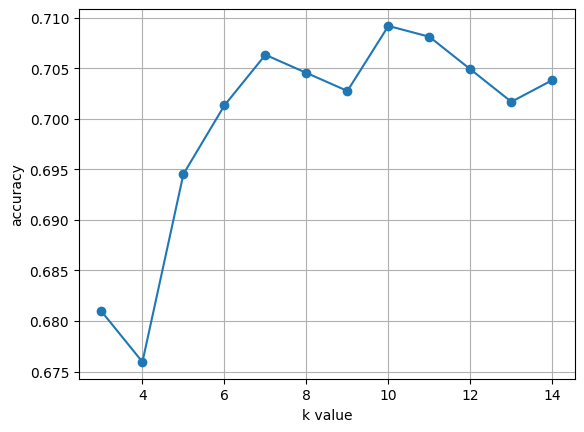

In [36]:
metric = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
    classifier.fit(x_train, y_train)
    y_pred_knn = classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred_knn)
    metric.append(acc)


plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [37]:
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)
y_knn = classifier.predict(x_test)

print('Accuracy =', accuracy_score(y_test, y_knn))
print(confusion_matrix(y_test, y_knn))

Accuracy = 0.7045373347624152
[[ 931  336]
 [ 491 1041]]


## Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [39]:
dt.fit(x_train, y_train)
y_dt = dt.predict(x_test)

print('Accuracy =', accuracy_score(y_test, y_dt))
print(confusion_matrix(y_test, y_dt))

Accuracy = 0.7695605573419079
[[ 949  318]
 [ 327 1205]]


## Random forest CLassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [41]:
rf.fit(x_train, y_train)
y_rf = dt.predict(x_test)

print('Accuracy =', accuracy_score(y_test, y_rf))
print(confusion_matrix(y_test, y_rf))

Accuracy = 0.7695605573419079
[[ 949  318]
 [ 327 1205]]


## XG Boost Classifier

In [42]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [43]:
xgb.fit(x_train, y_train)
y_xgb = xgb.predict(x_test)

print('Accuracy =', accuracy_score(y_test, y_xgb))
print(confusion_matrix(y_test, y_xgb))

Accuracy = 0.8385137549124687
[[1052  215]
 [ 237 1295]]


### **XGBoost gives an accuracy of 83.85%(approx 84%). Therefore, the classifier selected for the prediciton of player selection is XGBoost**


## Fine Tuning

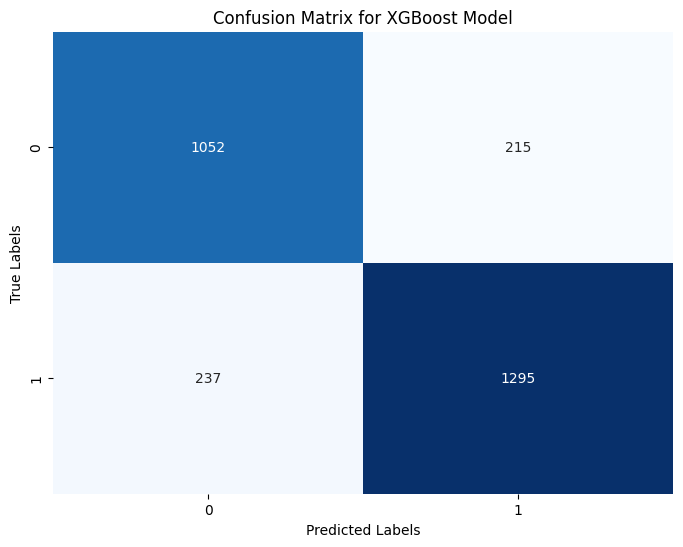

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 'y_test' contains the true labels and 'y_xgb' contains the predicted labels
conf_matrix = confusion_matrix(y_test, y_xgb)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

In [45]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# Define the hyperparameters and their distributions for Randomized Search
param_dist = {
    'max_depth': stats.randint(3, 8),
    'min_child_weight': stats.randint(1, 6),
    'subsample': stats.uniform(0.6, 0.4),
    'colsample_bytree': stats.uniform(0.6, 0.4),
    'learning_rate': [0.01, 0.1, 0.2]
}

# Create the Randomized Search object
random_search = RandomizedSearchCV(
    estimator=XGBClassifier(verbosity=0),  # Set verbosity to 0 to suppress output
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=3,
    verbose=0,
    random_state=42,
    n_jobs=-1
)

# Fit the Randomized Search object to the training data
random_search.fit(x_train, y_train)

# Get the best model from the randomized search
best_xgb = random_search.best_estimator_

# Predict using the best model on the test set
y_pred = best_xgb.predict(x_test)

# Print the accuracy and confusion matrix of the best model
print("Accuracy after Fine-Tuning:", accuracy_score(y_test, y_pred))
print("Confusion Matrix after Fine-Tuning:")
print(confusion_matrix(y_test, y_pred))

Accuracy after Fine-Tuning: 0.8381564844587353
Confusion Matrix after Fine-Tuning:
[[1052  215]
 [ 238 1294]]


## Confusion Matrix and ROC curve

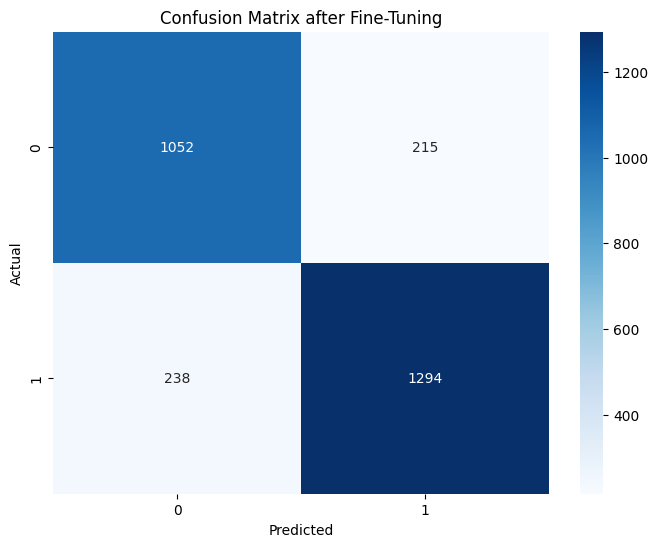

In [46]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix after Fine-Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

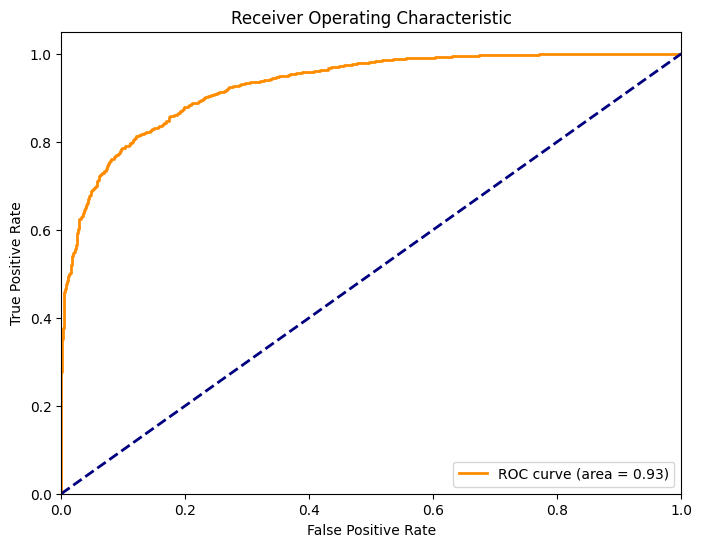

In [47]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, best_xgb.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

An ROC curve of 0.93 is indicative of a good classifier performance, particularly in binary classification tasks. The ROC curve plots the true positive rate (sensitivity) against the false positive rate (1 - specificity) for various threshold values, allowing you to visualize the trade-off between sensitivity and specificity.